In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [3]:
df = pd.read_csv("Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()
df.describe()
df['Species'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [5]:
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


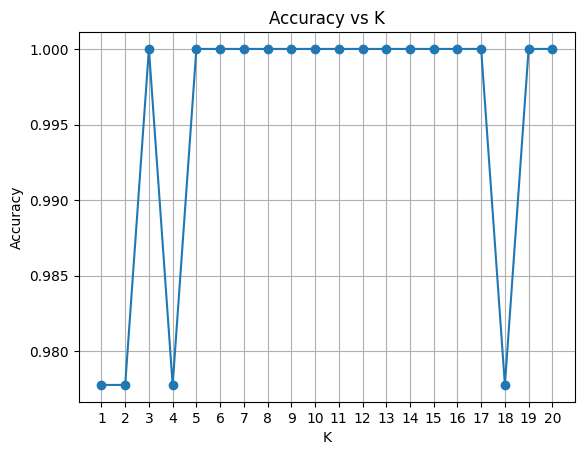

In [8]:
accuracy_scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot Accuracy vs. K
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()


Best K: 3


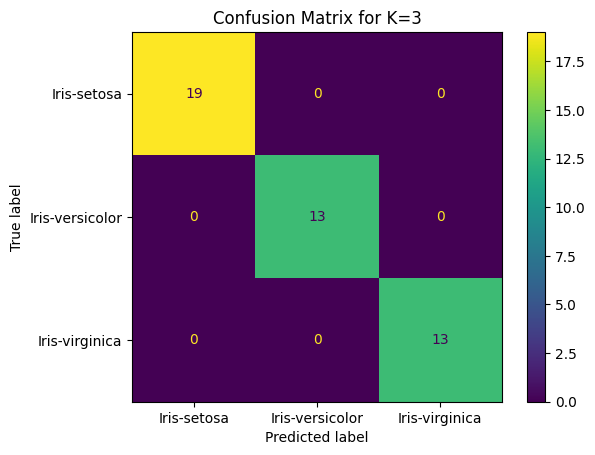

In [9]:
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best K: {best_k}")

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title(f'Confusion Matrix for K={best_k}')
plt.show()


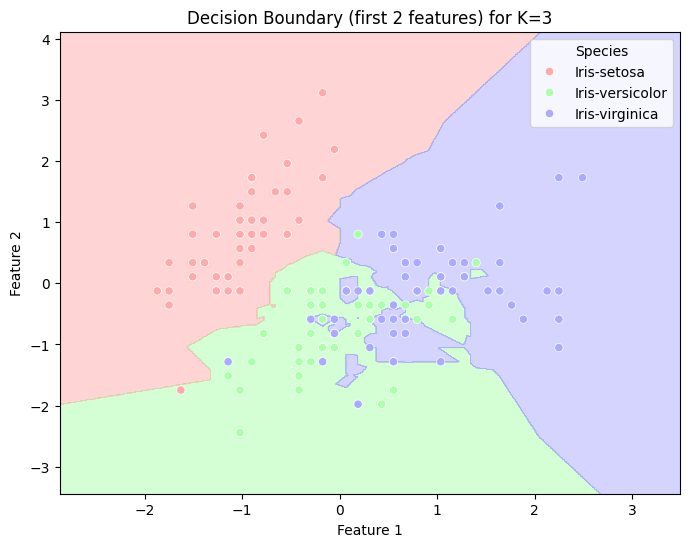

In [11]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_scaled and y are already defined from previous steps

# Only using first two features for 2D visualization
X_vis = X_scaled[:, :2]

X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vis, y, test_size=0.3, random_state=42)

knn_v = KNeighborsClassifier(n_neighbors=best_k) # Assuming best_k is defined
knn_v.fit(X_train_v, y_train_v)

# Create mesh
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = knn_v.predict(np.c_[xx.ravel(), yy.ravel()])

# Map string labels to numerical values
# Get the unique class labels from y and create a mapping
label_map = {label: i for i, label in enumerate(np.unique(y))}
Z_numeric = np.array([label_map[label] for label in Z.ravel()])
Z_numeric = Z_numeric.reshape(xx.shape)


plt.figure(figsize=(8, 6))
# Use a colormap appropriate for the number of classes (e.g., 3 for Iris)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
# Use the numerical Z array for contourf
plt.contourf(xx, yy, Z_numeric, cmap=cmap_light, alpha=0.5) # Added alpha for better visualization

# Plot training points
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y, palette=cmap_light.colors[:len(np.unique(y))]) # Use the same colors as the contour
plt.title(f'Decision Boundary (first 2 features) for K={best_k}')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()